In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
df = pd.DataFrame(load_breast_cancer()['data'], 
columns=load_breast_cancer()['feature_names']) 
df['y'] = load_breast_cancer()['target'] 

In [2]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [3]:
## Decision Tree Classifier ##

In [4]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.model_selection import RandomizedSearchCV

In [5]:
X = df.iloc[:, :-1] 
y = df.iloc[:, -1]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [7]:
clf = DecisionTreeClassifier()
param_dist = {'criterion': ['gini', 'entropy'], 'max_depth': [10, 20, 50, 100], 'min_samples_leaf':
[10, 20, 50]}
clf_cv = RandomizedSearchCV(clf, param_dist, cv = 5)
clf_cv.fit(X_train,y_train) #training
y_pred = clf_cv.predict(X_test) #prediction
y_train_pred = clf_cv.predict(X_train)
print("Accuracy:",metrics.accuracy_score(y_train, y_train_pred))

Accuracy: 0.964824120603015


In [8]:
#Model seems to be overfit#
#Accuracy

In [9]:
##Evaluation##
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.935672514619883


In [10]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [12]:
## Random Forest##

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, Normalizer, scale
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import confusion_matrix, log_loss, auc, roc_curve, roc_auc_score, recall_score, precision_recall_curve
from sklearn.metrics import make_scorer, precision_score, fbeta_score, f1_score, classification_report
from sklearn.model_selection import cross_val_score, train_test_split, KFold, StratifiedShuffleSplit, GridSearchCV
from sklearn.linear_model import LogisticRegression

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)

In [14]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = .33, stratify = y, random_state = 0)
estimator = RandomForestClassifier(random_state=0, warm_start = True)

In [15]:
rf_tuned_parameters = {'criterion': ['gini', 'entropy'], 'max_depth': [10, 20, 50, 100], 'min_samples_leaf':
[10, 20, 50]}

In [16]:
cv_grid = GridSearchCV(estimator, param_grid = rf_tuned_parameters, scoring = 'roc_auc', verbose = 5) # 'recall', my_score
cv_grid.fit(Xtrain, ytrain)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END criterion=gini, max_depth=10, min_samples_leaf=10;, score=0.994 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, min_samples_leaf=10;, score=0.984 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, min_samples_leaf=10;, score=0.996 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, min_samples_leaf=10;, score=0.991 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, min_samples_leaf=10;, score=0.999 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, min_samples_leaf=20;, score=0.994 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, min_samples_leaf=20;, score=0.976 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, min_samples_leaf=20;, score=0.993 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, min_samples_leaf=20;, score=0.991 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, min_samples_leaf=20;, score=0.9

[CV 2/5] END criterion=entropy, max_depth=20, min_samples_leaf=50;, score=0.970 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=20, min_samples_leaf=50;, score=0.987 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=20, min_samples_leaf=50;, score=0.990 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=20, min_samples_leaf=50;, score=0.996 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=50, min_samples_leaf=10;, score=0.995 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=50, min_samples_leaf=10;, score=0.983 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=50, min_samples_leaf=10;, score=0.994 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=50, min_samples_leaf=10;, score=0.991 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=50, min_samples_leaf=10;, score=0.999 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=50, min_samples_leaf=20;, score=0.994 total time=   0.0s
[CV 2/5] E

GridSearchCV(estimator=RandomForestClassifier(random_state=0, warm_start=True),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 50, 100],
                         'min_samples_leaf': [10, 20, 50]},
             scoring='roc_auc', verbose=5)

In [17]:
print (cv_grid.cv_results_)

{'mean_fit_time': array([0.08385186, 0.08572831, 0.13185821, 0.10892215, 0.10127449,
       0.07826934, 0.09892111, 0.09232283, 0.08751478, 0.07838578,
       0.07753229, 0.07395382, 0.09205484, 0.08238802, 0.07504644,
       0.08631806, 0.08539004, 0.07497478, 0.09415689, 0.08522859,
       0.07623739, 0.09468708, 0.08234048, 0.07838612]), 'std_fit_time': array([0.00354306, 0.00694747, 0.04836482, 0.01292812, 0.01737113,
       0.00458106, 0.0125553 , 0.02261828, 0.01043389, 0.00112552,
       0.00466494, 0.00938685, 0.00340393, 0.00243632, 0.00368251,
       0.0033218 , 0.00341403, 0.00281603, 0.0100406 , 0.00498738,
       0.00116897, 0.00748044, 0.0019718 , 0.00399815]), 'mean_score_time': array([0.00683579, 0.0086081 , 0.00920053, 0.00760183, 0.00940337,
       0.00670652, 0.00820088, 0.00720181, 0.00720043, 0.00582414,
       0.00658069, 0.0064167 , 0.00620303, 0.00679984, 0.0059978 ,
       0.00691485, 0.00619912, 0.00618277, 0.00760803, 0.00660386,
       0.00659022, 0.0078156 

In [18]:
best_parameters = cv_grid.best_estimator_.get_params()
best_parameters

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': True}

In [19]:
for param_name in sorted(rf_tuned_parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

	criterion: 'gini'
	max_depth: 10
	min_samples_leaf: 10


In [20]:
pred_test = cv_grid.predict(Xtest)
print(recall_score(ytest, pred_test))     
print(precision_score(ytest, pred_test))  
print(roc_auc_score(ytest, pred_test))    
print("confustion matrix on validation data: \n" + str(confusion_matrix(ytest, pred_test)))

0.9576271186440678
0.9416666666666667
0.928813559322034
confustion matrix on validation data: 
[[ 63   7]
 [  5 113]]


In [21]:
#GBM

In [22]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier

seed = 999

In [23]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = .33, stratify = y, random_state = seed)

In [24]:
gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
gradient_booster.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [25]:
gradient_booster.fit(Xtrain,ytrain)
print(classification_report(ytest,gradient_booster.predict(Xtest)))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97        70
           1       0.97      0.99      0.98       118

    accuracy                           0.98       188
   macro avg       0.98      0.97      0.98       188
weighted avg       0.98      0.98      0.98       188



In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
estimator = GradientBoostingClassifier()

In [28]:
rf_tuned_parameters = {"max_depth": [10, 20, 50, 100], 'n_estimators': [50, 100, 200, 500], 'min_samples_leaf': [10, 20, 50], 'learning_rate': [0.1, 0.01]}

In [29]:
cv_grid = GridSearchCV(estimator, param_grid = rf_tuned_parameters, scoring = 'roc_auc', verbose = 5) # 'recall', my_score
cv_grid.fit(Xtrain, ytrain)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV 1/5] END learning_rate=0.1, max_depth=10, min_samples_leaf=10, n_estimators=50;, score=0.996 total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=10, min_samples_leaf=10, n_estimators=50;, score=0.990 total time=   0.1s
[CV 3/5] END learning_rate=0.1, max_depth=10, min_samples_leaf=10, n_estimators=50;, score=0.999 total time=   0.1s
[CV 4/5] END learning_rate=0.1, max_depth=10, min_samples_leaf=10, n_estimators=50;, score=0.980 total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=10, min_samples_leaf=10, n_estimators=50;, score=0.987 total time=   0.1s
[CV 1/5] END learning_rate=0.1, max_depth=10, min_samples_leaf=10, n_estimators=100;, score=0.996 total time=   0.2s
[CV 2/5] END learning_rate=0.1, max_depth=10, min_samples_leaf=10, n_estimators=100;, score=0.993 total time=   0.2s
[CV 3/5] END learning_rate=0.1, max_depth=10, min_samples_leaf=10, n_estimators=100;, score=0.996 total time=   0.2s
[CV 4/5

[CV 1/5] END learning_rate=0.1, max_depth=20, min_samples_leaf=10, n_estimators=200;, score=0.996 total time=   0.5s
[CV 2/5] END learning_rate=0.1, max_depth=20, min_samples_leaf=10, n_estimators=200;, score=0.995 total time=   0.6s
[CV 3/5] END learning_rate=0.1, max_depth=20, min_samples_leaf=10, n_estimators=200;, score=0.996 total time=   0.6s
[CV 4/5] END learning_rate=0.1, max_depth=20, min_samples_leaf=10, n_estimators=200;, score=0.988 total time=   0.6s
[CV 5/5] END learning_rate=0.1, max_depth=20, min_samples_leaf=10, n_estimators=200;, score=0.990 total time=   0.6s
[CV 1/5] END learning_rate=0.1, max_depth=20, min_samples_leaf=10, n_estimators=500;, score=0.996 total time=   0.7s
[CV 2/5] END learning_rate=0.1, max_depth=20, min_samples_leaf=10, n_estimators=500;, score=0.993 total time=   0.7s
[CV 3/5] END learning_rate=0.1, max_depth=20, min_samples_leaf=10, n_estimators=500;, score=0.994 total time=   0.7s
[CV 4/5] END learning_rate=0.1, max_depth=20, min_samples_leaf=1

[CV 2/5] END learning_rate=0.1, max_depth=50, min_samples_leaf=20, n_estimators=50;, score=0.996 total time=   0.0s
[CV 3/5] END learning_rate=0.1, max_depth=50, min_samples_leaf=20, n_estimators=50;, score=0.994 total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=50, min_samples_leaf=20, n_estimators=50;, score=0.983 total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=50, min_samples_leaf=20, n_estimators=50;, score=0.987 total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=50, min_samples_leaf=20, n_estimators=100;, score=0.995 total time=   0.1s
[CV 2/5] END learning_rate=0.1, max_depth=50, min_samples_leaf=20, n_estimators=100;, score=0.994 total time=   0.1s
[CV 3/5] END learning_rate=0.1, max_depth=50, min_samples_leaf=20, n_estimators=100;, score=0.992 total time=   0.1s
[CV 4/5] END learning_rate=0.1, max_depth=50, min_samples_leaf=20, n_estimators=100;, score=0.983 total time=   0.1s
[CV 5/5] END learning_rate=0.1, max_depth=50, min_samples_leaf=20, n

[CV 2/5] END learning_rate=0.1, max_depth=100, min_samples_leaf=20, n_estimators=200;, score=0.995 total time=   0.3s
[CV 3/5] END learning_rate=0.1, max_depth=100, min_samples_leaf=20, n_estimators=200;, score=0.993 total time=   0.3s
[CV 4/5] END learning_rate=0.1, max_depth=100, min_samples_leaf=20, n_estimators=200;, score=0.987 total time=   0.3s
[CV 5/5] END learning_rate=0.1, max_depth=100, min_samples_leaf=20, n_estimators=200;, score=0.991 total time=   0.3s
[CV 1/5] END learning_rate=0.1, max_depth=100, min_samples_leaf=20, n_estimators=500;, score=0.996 total time=   0.7s
[CV 2/5] END learning_rate=0.1, max_depth=100, min_samples_leaf=20, n_estimators=500;, score=0.996 total time=   0.6s
[CV 3/5] END learning_rate=0.1, max_depth=100, min_samples_leaf=20, n_estimators=500;, score=0.992 total time=   0.6s
[CV 4/5] END learning_rate=0.1, max_depth=100, min_samples_leaf=20, n_estimators=500;, score=0.986 total time=   0.6s
[CV 5/5] END learning_rate=0.1, max_depth=100, min_sampl

[CV 4/5] END learning_rate=0.01, max_depth=10, min_samples_leaf=50, n_estimators=50;, score=0.961 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=10, min_samples_leaf=50, n_estimators=50;, score=0.991 total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=10, min_samples_leaf=50, n_estimators=100;, score=0.976 total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=10, min_samples_leaf=50, n_estimators=100;, score=0.992 total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=10, min_samples_leaf=50, n_estimators=100;, score=0.994 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=10, min_samples_leaf=50, n_estimators=100;, score=0.966 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=10, min_samples_leaf=50, n_estimators=100;, score=0.992 total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=10, min_samples_leaf=50, n_estimators=200;, score=0.974 total time=   0.1s
[CV 2/5] END learning_rate=0.01, max_depth=10, min_samples

[CV 4/5] END learning_rate=0.01, max_depth=20, min_samples_leaf=50, n_estimators=200;, score=0.972 total time=   0.2s
[CV 5/5] END learning_rate=0.01, max_depth=20, min_samples_leaf=50, n_estimators=200;, score=0.991 total time=   0.1s
[CV 1/5] END learning_rate=0.01, max_depth=20, min_samples_leaf=50, n_estimators=500;, score=0.980 total time=   0.5s
[CV 2/5] END learning_rate=0.01, max_depth=20, min_samples_leaf=50, n_estimators=500;, score=0.994 total time=   0.5s
[CV 3/5] END learning_rate=0.01, max_depth=20, min_samples_leaf=50, n_estimators=500;, score=0.996 total time=   0.5s
[CV 4/5] END learning_rate=0.01, max_depth=20, min_samples_leaf=50, n_estimators=500;, score=0.977 total time=   0.5s
[CV 5/5] END learning_rate=0.01, max_depth=20, min_samples_leaf=50, n_estimators=500;, score=0.993 total time=   0.5s
[CV 1/5] END learning_rate=0.01, max_depth=50, min_samples_leaf=10, n_estimators=50;, score=0.964 total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=50, min_sample

[CV 4/5] END learning_rate=0.01, max_depth=100, min_samples_leaf=10, n_estimators=50;, score=0.956 total time=   0.1s
[CV 5/5] END learning_rate=0.01, max_depth=100, min_samples_leaf=10, n_estimators=50;, score=0.951 total time=   0.1s
[CV 1/5] END learning_rate=0.01, max_depth=100, min_samples_leaf=10, n_estimators=100;, score=0.993 total time=   0.3s
[CV 2/5] END learning_rate=0.01, max_depth=100, min_samples_leaf=10, n_estimators=100;, score=0.975 total time=   0.3s
[CV 3/5] END learning_rate=0.01, max_depth=100, min_samples_leaf=10, n_estimators=100;, score=0.999 total time=   0.3s
[CV 4/5] END learning_rate=0.01, max_depth=100, min_samples_leaf=10, n_estimators=100;, score=0.966 total time=   0.2s
[CV 5/5] END learning_rate=0.01, max_depth=100, min_samples_leaf=10, n_estimators=100;, score=0.973 total time=   0.2s
[CV 1/5] END learning_rate=0.01, max_depth=100, min_samples_leaf=10, n_estimators=200;, score=0.998 total time=   0.5s
[CV 2/5] END learning_rate=0.01, max_depth=100, mi

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.01],
                         'max_depth': [10, 20, 50, 100],
                         'min_samples_leaf': [10, 20, 50],
                         'n_estimators': [50, 100, 200, 500]},
             scoring='roc_auc', verbose=5)

In [30]:
best_parameters = cv_grid.best_estimator_.get_params()
best_parameters

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 50,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [31]:
for param_name in sorted(rf_tuned_parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

	learning_rate: 0.1
	max_depth: 50
	min_samples_leaf: 10
	n_estimators: 200


In [32]:
print(classification_report(ytest,gradient_booster.predict(Xtest)))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97        70
           1       0.97      0.99      0.98       118

    accuracy                           0.98       188
   macro avg       0.98      0.97      0.98       188
weighted avg       0.98      0.98      0.98       188



In [33]:
print(classification_report(ytest,cv_grid.predict(Xtest)))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        70
           1       0.97      0.97      0.97       118

    accuracy                           0.97       188
   macro avg       0.97      0.97      0.97       188
weighted avg       0.97      0.97      0.97       188



Confusion Matrix : 
 [[ 67   3]
 [  3 115]]
Accuracy Score is 0.9681
Classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        70
           1       0.97      0.97      0.97       118

    accuracy                           0.97       188
   macro avg       0.97      0.97      0.97       188
weighted avg       0.97      0.97      0.97       188

AUC-ROC: 0.965859564164649
LOGLOSS Value is 1.1023


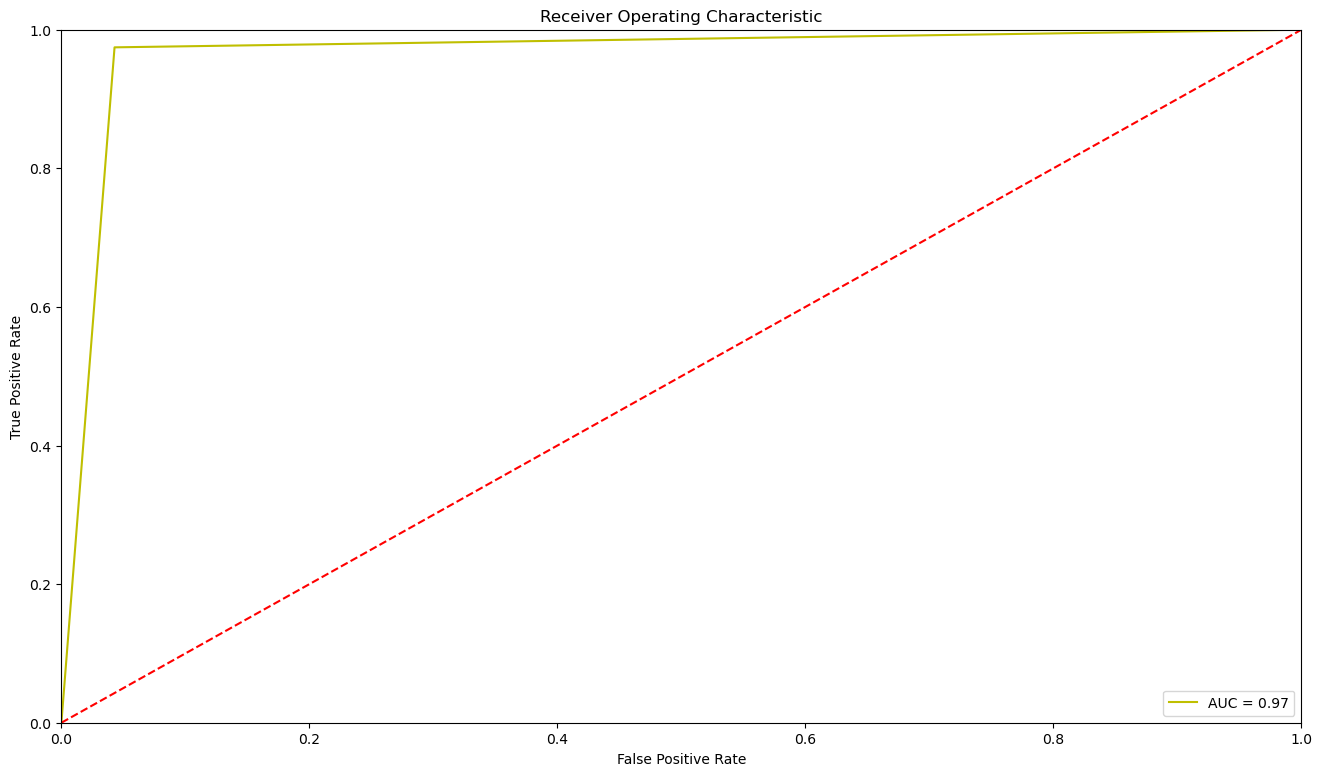

In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, log_loss, roc_curve, auc

ypred = cv_grid.predict(Xtest)
fpr, tpr, thresholds = roc_curve(ytest, ypred)
roc_auc = auc(fpr, tpr)
results = confusion_matrix(ytest, ypred)
print ('Confusion Matrix : \n', results)
print ('Accuracy Score is %.4f' % (accuracy_score(ytest, ypred)))
print ('Classification Report : \n', classification_report(ytest, ypred))
print('AUC-ROC:',roc_auc_score(ytest, ypred))
print('LOGLOSS Value is %.4f' % log_loss(ytest, ypred))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [35]:
#KNN#

In [36]:
from sklearn import datasets
bc=datasets.load_breast_cancer()

In [37]:
X_train, X_test, y_train, y_test = train_test_split(bc.data, bc.target, test_size=0.3) 

In [39]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=5)

kn.fit(X_train, y_train)

y_pred = kn.predict(X_test)
print(y_pred)

[1 0 1 0 0 0 0 1 0 1 1 0 1 1 0 0 1 0 0 1 1 0 0 1 1 1 0 1 0 1 1 1 0 0 0 1 1
 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 0
 0 1 1 0 1 1 1 0 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 1 0
 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0]


C:\Users\Arrnav Dutta\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [40]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.935672514619883


In [41]:
#All the models indiacte accuracy higher than 90%. GBM might be over fit with around 5% more accuracy being displayed then the other models